In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
import seaborn as sns
import xgboost as xgb


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy

In [ ]:
url = 'https://raw.githubusercontent.com/soghac/Simulation-based-system/main/data/response%20data.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_scaled=scaler.fit_transform(x_train)

In [ ]:
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [ ]:
AdaBoost_model=AdaBoostRegressor()

In [ ]:
AdaBoost_model.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
AdaBoost_model.score(x_test,y_test)

0.9326020727170877

In [ ]:
AdaBoost_model.score(x_train,y_train)

0.9385302364584389

In [ ]:
y_pred = AdaBoost_model.predict(x_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 24.961463340636996
Mean Squared Error: 2190.503821373784
Root Mean Squared Error: 46.80281851954841


In [ ]:
%%capture
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
permuter = PermutationImportance(
    estimator=AdaBoost_model,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=AdaBoostRegressor(), random_state=42,
                      scoring='r2')

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(
    AdaBoost_model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

In [ ]:
sorted_importances_idx

array([2, 6, 7, 1, 5, 0, 4, 3])

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,1.415953e-07,0.028421,0.238348,0.341200,1.369192
1,0.0,0.0,0.0,1.111415e-07,0.025799,0.264337,0.310424,1.546930
2,0.0,0.0,0.0,1.447342e-07,0.021050,0.242315,0.303547,1.637408
3,0.0,0.0,0.0,9.889649e-08,0.030444,0.253032,0.331376,1.452263
4,0.0,0.0,0.0,2.383484e-09,0.019530,0.248893,0.326898,1.601529
5,0.0,0.0,0.0,1.137894e-07,0.027769,0.248705,0.387247,1.443688
6,0.0,0.0,0.0,1.381864e-07,0.018863,0.196350,0.349007,1.539635
7,0.0,0.0,0.0,1.284677e-07,0.021172,0.262025,0.292132,1.505574
8,0.0,0.0,0.0,1.804888e-08,0.027581,0.235998,0.377958,1.604128
9,0.0,0.0,0.0,9.760781e-09,0.019588,0.283903,0.362906,1.482896


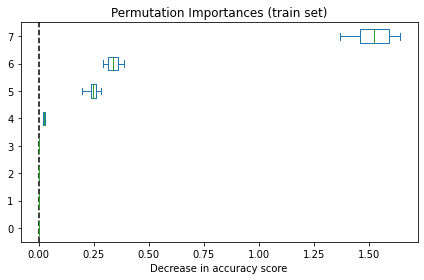

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
AdaBoost_model.feature_importances_

array([0.10290875, 0.00122777, 0.        , 0.68239086, 0.16604557,
       0.04742705, 0.        , 0.        ])

In [ ]:
df.columns

Index(['online user', '# Spark workers', '#VMs', 'size of data',
       'Amount of memory of workers', '# cores of workers', 'total memory',
       '#cores of VMs', 'Ave response time'],
      dtype='object')

In [ ]:
from scipy.stats import spearmanr

In [ ]:
#Adaboost
coef, p = spearmanr(y_test, y_pred)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.954
Samples are correlated (reject H0) p=0.000


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = AdaBoost_model, X = x_test_scaled, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()

0.023525009297171707

In [ ]:
accuracies.mean()

0.9391625545569611

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.inspection import permutation_importance
imp = permutation_importance(regressor, x_train, y_train
                           )

imp


{'importances_mean': array([2.65649321e-01, 2.92114439e-02, 4.63114639e-04, 1.53964015e+00,
        4.87381463e-02, 4.76133707e-02, 2.72761657e-04, 8.62709119e-05]),
 'importances_std': array([3.17399494e-02, 1.65615772e-03, 4.35446777e-05, 5.21626881e-02,
        2.89754058e-03, 2.45264210e-03, 2.95825649e-05, 1.43018363e-05]),
 'importances': array([[2.70377000e-01, 2.28320480e-01, 3.04159934e-01, 2.95258382e-01,
         2.30130807e-01],
        [2.70389560e-02, 2.98545323e-02, 3.18988802e-02, 2.92190204e-02,
         2.80458307e-02],
        [4.15222674e-04, 4.93346492e-04, 4.08832092e-04, 5.18303428e-04,
         4.79868510e-04],
        [1.60100800e+00, 1.51188099e+00, 1.59768088e+00, 1.46643286e+00,
         1.52119802e+00],
        [4.72123414e-02, 5.18860664e-02, 5.17861598e-02, 4.85877772e-02,
         4.42183865e-02],
        [4.37199506e-02, 4.81420480e-02, 5.06650819e-02, 4.93942497e-02,
         4.61455235e-02],
        [2.39247804e-04, 2.91595753e-04, 2.37917307e-04, 3.1

In [ ]:
%%capture
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
permuter = PermutationImportance(
    estimator=regressor,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=RandomForestRegressor(n_estimators=20,
                                                      random_state=0),
                      random_state=42, scoring='r2')

In [ ]:
result = permutation_importance(
    regressor, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.000225,0.000232,0.000378,0.035641,0.048762,0.060001,0.274125,1.394861
1,0.000223,0.000230,0.000375,0.030287,0.042439,0.052410,0.308515,1.572108
2,0.000241,0.000249,0.000401,0.029847,0.041563,0.050612,0.271831,1.662604
3,0.000216,0.000223,0.000366,0.033165,0.046182,0.056995,0.283576,1.474419
4,0.000204,0.000211,0.000353,0.030178,0.043099,0.053128,0.288161,1.623185
5,0.000210,0.000216,0.000355,0.037711,0.053729,0.066453,0.288541,1.455342
6,0.000207,0.000213,0.000357,0.030730,0.044710,0.056002,0.231831,1.574662
7,0.000207,0.000213,0.000354,0.027980,0.038829,0.047388,0.302510,1.515122
8,0.000206,0.000212,0.000345,0.038003,0.053242,0.065729,0.273828,1.613737
9,0.000205,0.000211,0.000347,0.034638,0.048984,0.060430,0.314782,1.495873


In [ ]:
sorted_importances_idx

array([7, 6, 2, 1, 5, 4, 0, 3])

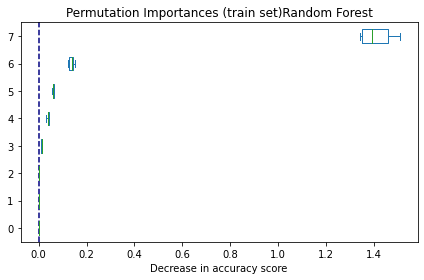

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)Random Forest")
ax.axvline(x=0, color="navy", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 17.066091900841396
Mean Squared Error: 1507.7771615237166
Root Mean Squared Error: 38.83010638053567


In [ ]:
regressor.feature_importances_

array([1.43355516e-01, 4.63109285e-02, 5.81892300e-04, 6.79732024e-01,
       6.89721250e-02, 6.02326267e-02, 5.00006723e-04, 3.14881184e-04])

In [ ]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = regressor, X = x_test_scaled, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()

0.022237088373185415

In [ ]:
accuracies.mean()

0.9509182853771708

In [ ]:
from sklearn.metrics import mean_absolute_error 

In [ ]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)
regression_model.fit(x_train,y_train)
# model evaluation
rmse = mean_squared_error(y, y_predicted)
mse = mean_squared_error(y, y_predicted)
mae = mean_absolute_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
regression_model.score(x_test,y_test)
from sklearn import metrics

In [ ]:
permuter = PermutationImportance(
    estimator=regression_model,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=LinearRegression(), random_state=42,
                      scoring='r2')

In [ ]:
result = permutation_importance(
    regression_model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

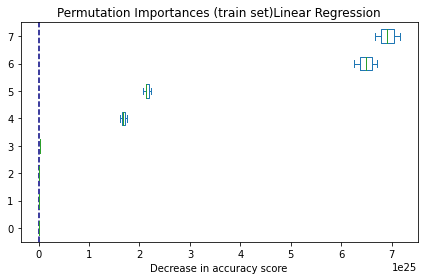

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)Linear Regression")
ax.axvline(x=0, color="navy", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.039649,1.240622,7.134207e+22,2.955048e+23,1.716397e+25,2.196371e+25,6.712403e+25,7.157202e+25
1,0.042267,1.317915,6.671135e+22,2.862122e+23,1.662423e+25,2.127303e+25,6.276709e+25,6.692637e+25
2,0.038610,1.354212,7.024227e+22,3.010803e+23,1.748782e+25,2.237812e+25,6.608926e+25,7.046868e+25
3,0.032345,1.256098,7.047381e+22,2.955048e+23,1.716397e+25,2.196371e+25,6.630710e+25,7.070096e+25
4,0.043555,1.399330,6.653769e+22,2.992218e+23,1.737987e+25,2.223999e+25,6.260371e+25,6.675216e+25
5,0.045082,1.247930,6.908459e+22,2.787781e+23,1.619243e+25,2.072048e+25,6.500002e+25,6.930727e+25
6,0.030896,1.363994,6.850575e+22,2.880707e+23,1.673217e+25,2.141117e+25,6.445541e+25,6.872656e+25
7,0.045070,1.251219,7.003968e+22,2.862122e+23,1.662423e+25,2.127303e+25,6.589864e+25,7.026543e+25
8,0.039275,1.346874,6.743490e+22,2.824951e+23,1.640833e+25,2.099676e+25,6.344787e+25,6.765226e+25
9,0.040019,1.257473,6.873729e+22,2.862122e+23,1.662423e+25,2.127303e+25,6.467325e+25,6.895884e+25


In [ ]:
sorted_importances_idx

array([2, 1, 7, 5, 0, 6, 4, 3])

In [ ]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Coefficients: \n', regression_model.coef_) 
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
regression_model.coef_
regression_model.intercept_

Slope: [ 2.49342200e+01 -1.00116514e+15 -5.74443526e+14  1.40687500e+02
  1.03380435e+15 -3.26392039e+13  5.07812469e+14  6.66310574e+13]
Intercept: 113.026313790101
Root mean squared error:  8497.097841478593
R2 score:  0.7267049600431809
Coefficients: 
 [ 2.49342200e+01 -1.00116514e+15 -5.74443526e+14  1.40687500e+02
  1.03380435e+15 -3.26392039e+13  5.07812469e+14  6.66310574e+13]
Mean Squared Error:  8497.097841478593
Mean Absolute Error:  56.49930168703813


113.026313790101

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.066091900841396
Mean Squared Error: 1507.7771615237166
Root Mean Squared Error: 38.83010638053567


In [ ]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [ ]:
get_score(LinearRegression(),x_train,x_test,y_train,y_test)

0.7391775311674722

In [ ]:
get_score(RandomForestRegressor() ,x_train,x_test,y_train,y_test)

0.9536632619279422

In [ ]:
regressor.score(x_train,y_train)

0.9543020778584539

In [ ]:
regressor.score(x_test,y_test)

0.9536083642038665

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 40)
tree.fit(x_train, y_train)
y_predic = tree.predict(x_test)

In [ ]:
permuter = PermutationImportance(
    estimator=tree,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=DecisionTreeRegressor(max_depth=40),
                      random_state=42, scoring='r2')

In [ ]:
result = permutation_importance(
    tree, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

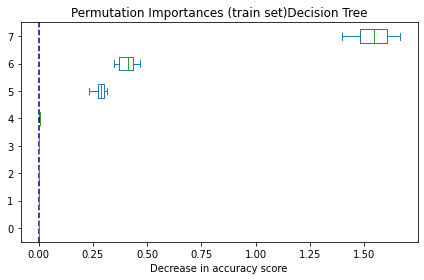

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)Decision Tree")
ax.axvline(x=0, color="navy", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.000331,0.002395,0.007267,0.273943,0.419475,1.396370
1,0.0,0.0,0.000279,0.002366,0.004915,0.308587,0.365574,1.574667
2,0.0,0.0,0.000199,0.002503,0.004043,0.272412,0.364541,1.663889
3,0.0,0.0,0.000259,0.002375,0.008230,0.283466,0.411984,1.476154
4,0.0,0.0,0.000282,0.002375,0.004184,0.288424,0.387823,1.625076
5,0.0,0.0,0.000334,0.002272,0.006813,0.288856,0.466213,1.457857
6,0.0,0.0,0.000245,0.002375,0.003472,0.232064,0.409574,1.577416
7,0.0,0.0,0.000315,0.002325,0.005409,0.302673,0.346191,1.516074
8,0.0,0.0,0.000313,0.002188,0.007464,0.274164,0.444492,1.616493
9,0.0,0.0,0.000236,0.002259,0.003372,0.315006,0.442167,1.498896


In [ ]:
#decision tree
coef, p = spearmanr(y_test, y_predic)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.973
Samples are correlated (reject H0) p=0.000


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree, X = x_test_scaled, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()


0.021902658686843046

In [ ]:
accuracies.mean()

0.9510683810734177

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predic))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))


Mean Absolute Error: 17.076901490223644
Mean Squared Error: 1510.6535708042366
Root Mean Squared Error: 38.867127123113136


In [ ]:
get_score(DecisionTreeRegressor() ,x_train,x_test,y_train,y_test)

0.9535198621790661

In [ ]:
tree.score(x_train,y_train)

0.9543437288709199

In [ ]:
coef, p = spearmanr(y_test, y_pred)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [ ]:
t, p = paired_ttest_5x2cv(estimator1=tree,
                          estimator2=regressor,
                          X=x_train, y=y_train,
                          random_seed=1)

In [ ]:
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.800
p value: 0.460


In [ ]:
tree.feature_importances_

array([1.45802856e-01, 1.69138723e-02, 1.12985172e-03, 6.50294430e-01,
       2.11194106e-04, 1.85647795e-01, 0.00000000e+00, 0.00000000e+00])

In [ ]:
df.columns

Index(['online user', '# Spark workers', '#VMs', 'size of data',
       'Amount of memory of workers', '# cores of workers', 'total memory',
       '#cores of VMs', 'Ave response time'],
      dtype='object')